In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model.lake_model import sim_H

In [62]:
# import data

# create artificial data
H = 24 * 365 * 50 # simulate 50 years of data
T_y =  24 * 365
T_lunar =  24.5

t = np.arange(H)
q_ij = np.ones(H)*200 ; q_ij[100:200]=2000 # 2000 * (1 + np.sin (t*2*np.pi/T_y))
q_lat = np.zeros(H)
q_dem = np.zeros(H)
h_wz = 0.5 * np.sin (t*2*np.pi/T_lunar)
wind_v = 10 * (1 + np.sin (t*2*np.pi/10)) 
wind_d = np.ones(H)

# create forcing dictionary
forcings = {}
forcings['discharge Ijssel'] = q_ij
forcings['discharge lateral'] = q_lat 
forcings['demamd'] = q_dem
forcings['level Wadden Sea'] = h_wz
forcings['wind velocity'] = wind_v
forcings['wind direction'] = wind_d

In [63]:
# parameters
par = {}

# Lake parameters
par['Delta_t'] = 3600 # hourly time-step

C = 0.88 # lateral contraction coefficient, [-];
MU = 0.66 # contraction coefficient, [-];
W_SIGMA = 120 + 180 # crest width, [m];
H_OP = 6.9 + 6.9 # opening height, [m];

par['K'] = C * MU * W_SIGMA * H_OP
par['lake surface'] = 1.182 * 10**9 # m^2


# wind parameters
par['a'] = np.sqrt(1.89 * 2.05)  # Geometric mean of the a coefficient for Stevinsluizen and Lorentsluis
par['b'] = 1

# wind direction parameter: 15 degrees for each value, from 0-15 to 345-360, last value repeated for interpoation
c_location = np.array(
# Stevinsluizen:      
[[-0.0049,0.00033,0.00547,0.00914,0.01037,0.00882,0.0049,-0.00033,-0.00547,-0.00914,-0.01037,-0.00882,-0.0049,-0.0049],
# Lorentsluis  
[-0.00715,-0.00591,-0.00308,0.00058,0.00407,0.00648,0.00715,0.00591,0.00308,-0.00058,-0.00407,-0.00648,-0.00715,-0.00715]]
)
c_mean = np.mean(c_location,0)
par['c'] = c_mean
par['h_0'] = 4.5

In [64]:
# policy
policy = {}
policy['h target'] = -0.4
policy['pumping capacity'] = 0

In [65]:
# test simulation
h_0 = -0.4

h_bar,h_wind,q_out,q_supply = sim_H(h_0,forcings,par,policy)

(0, 720)

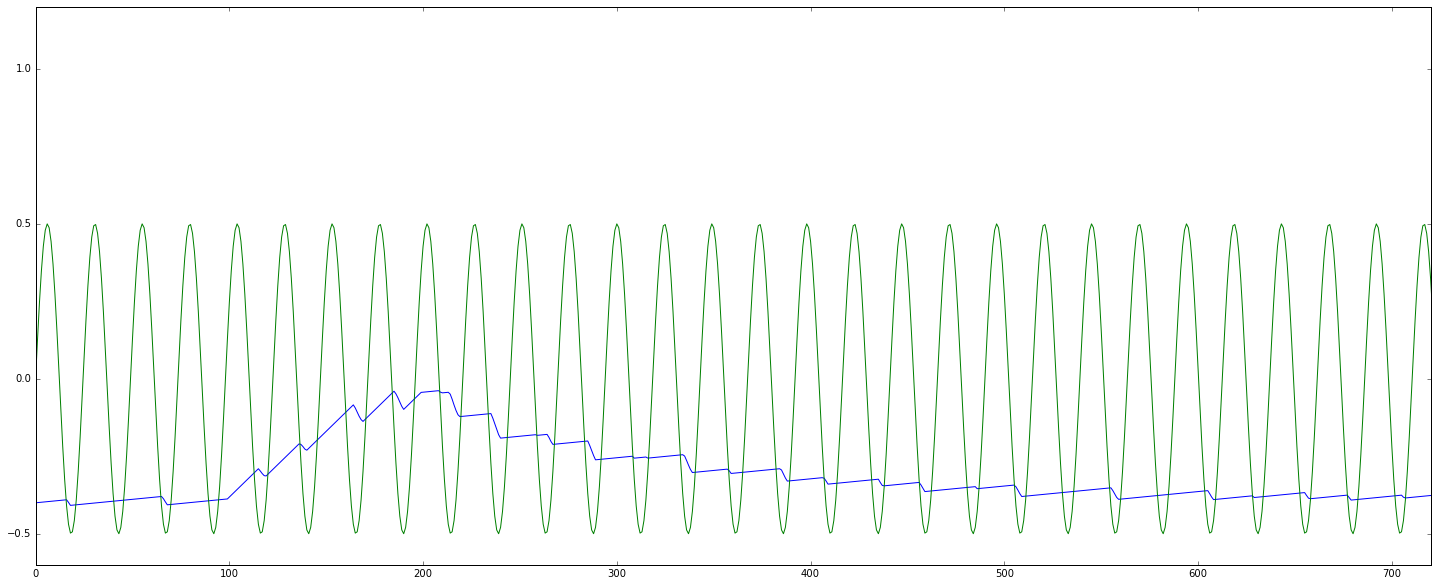

In [66]:
plt.figure(figsize=(25,10))
plt.plot(t,h_bar,t,h_wz)
plt.xlim([0,24*30])


(0, 720)

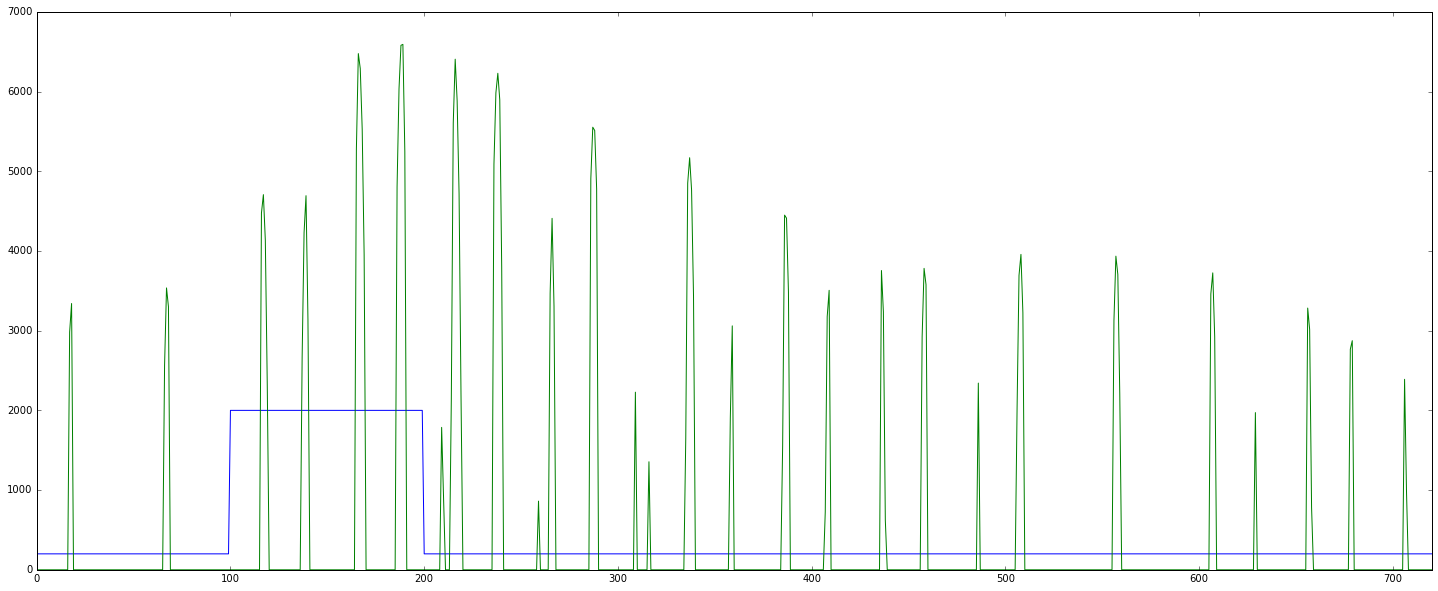

In [67]:
plt.figure(figsize=(25,10))
plt.plot(t,q_ij,t,q_out)
plt.xlim([0,24*30])

(0, 720)

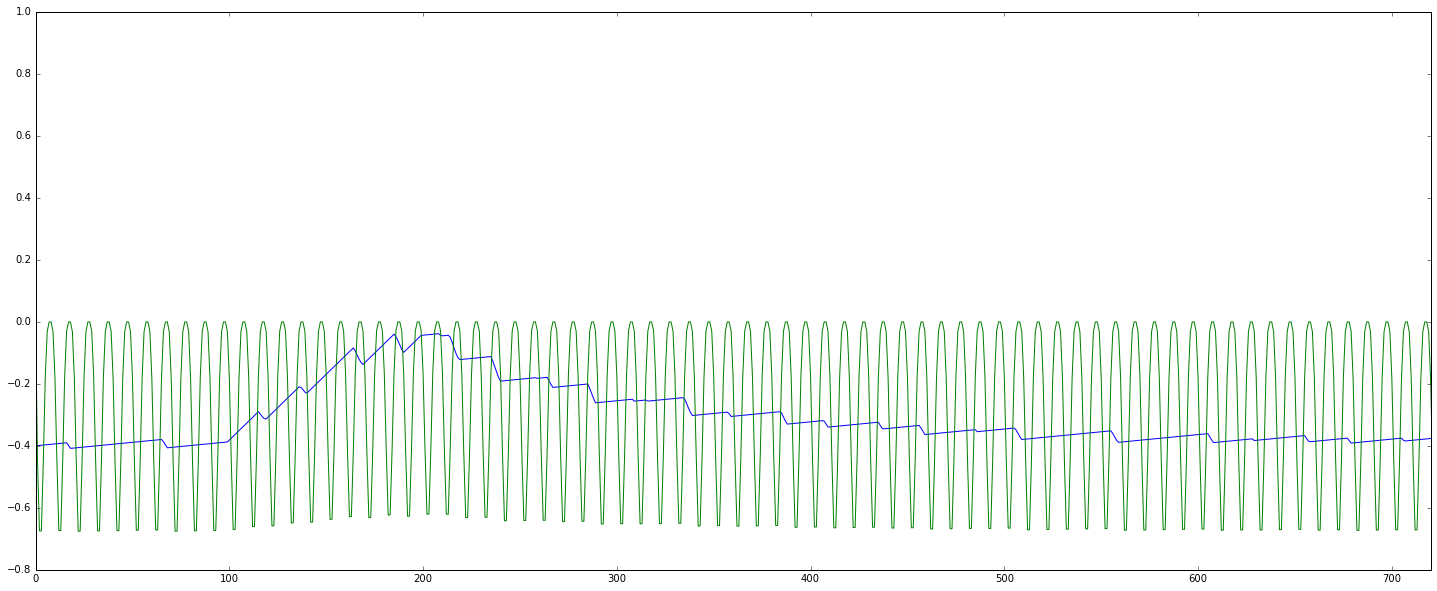

In [68]:
plt.figure(figsize=(25,10))
plt.plot(t,h_bar,t,h_wind)
plt.xlim([0,24*30])